# Distribution of the post-selection estimator

Based on Leeb and Potscher (2006). Figures 4.1 and 4.2 of the textbook

@author: jeremylhour

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Functions

In [22]:
def delta(x, y):
  return norm.cdf(x+y) - norm.cdf(x-y)

def post_selection_density(x, beta: float = .5, rho: float = .7, n: int = 100):
  c = np.sqrt(np.log(n))
  proba_r = delta(np.sqrt(n) * beta, c)
  y = proba_r * norm.pdf(x, loc=-rho * np.sqrt(n) * beta, scale=np.sqrt(1 - rho ** 2))
  y += (1 - delta((np.sqrt(n) * beta + rho * x) / np.sqrt(1 - rho ** 2), c / np.sqrt(1 - rho ** 2))) * norm.pdf(x)
  return y

LINESTYLES = {
  .5: "solid",
  .3: "dashed",
  .2: "dotted",
  .1: "dashdot"
}

COLORS = {
  .5: "black",
  .3: "red",
  .2: "green",
  .1: "blue"
}

# RHO = .7

In [23]:
x = np.arange(-3, 3, step=.1)
y = {beta: post_selection_density(x, beta) for beta in [.5, .3, .2, .1]}
    

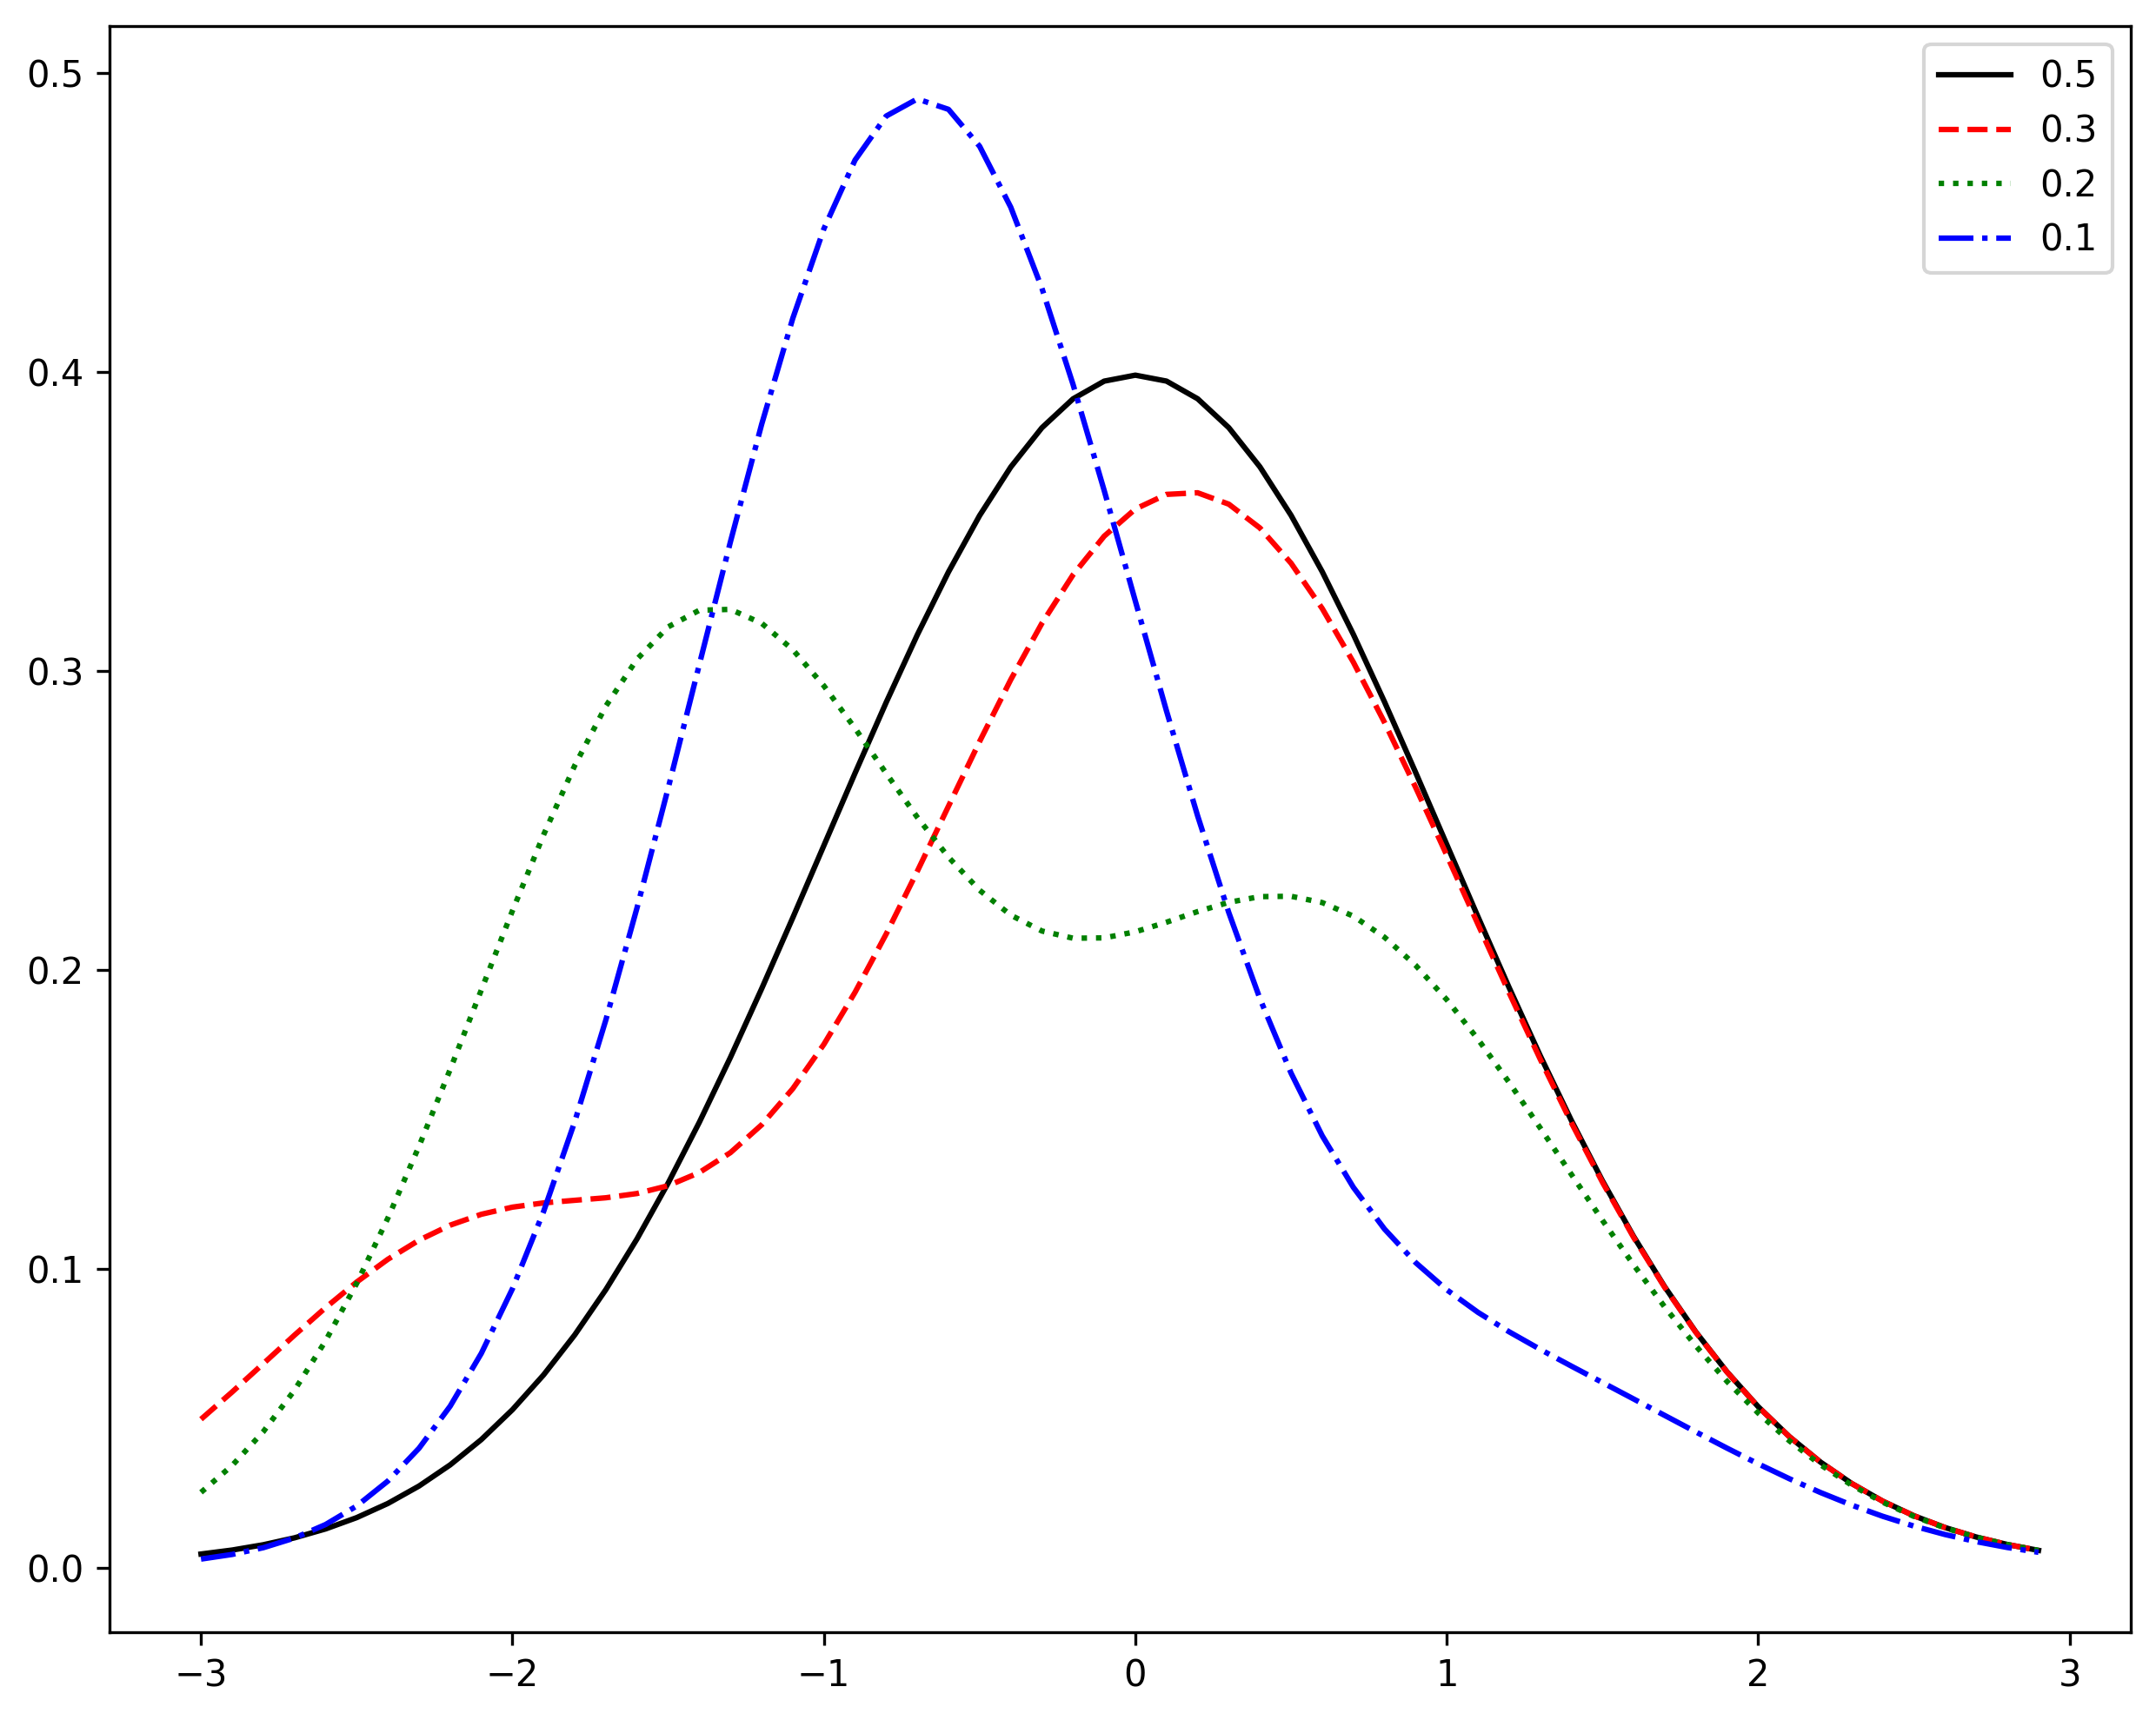

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)

for k, v in y.items():
    ax.plot(x, v, linestyle=LINESTYLES[k], color=COLORS[k])

ax.legend(labels=y.keys(), loc='best')

# RHO = .9

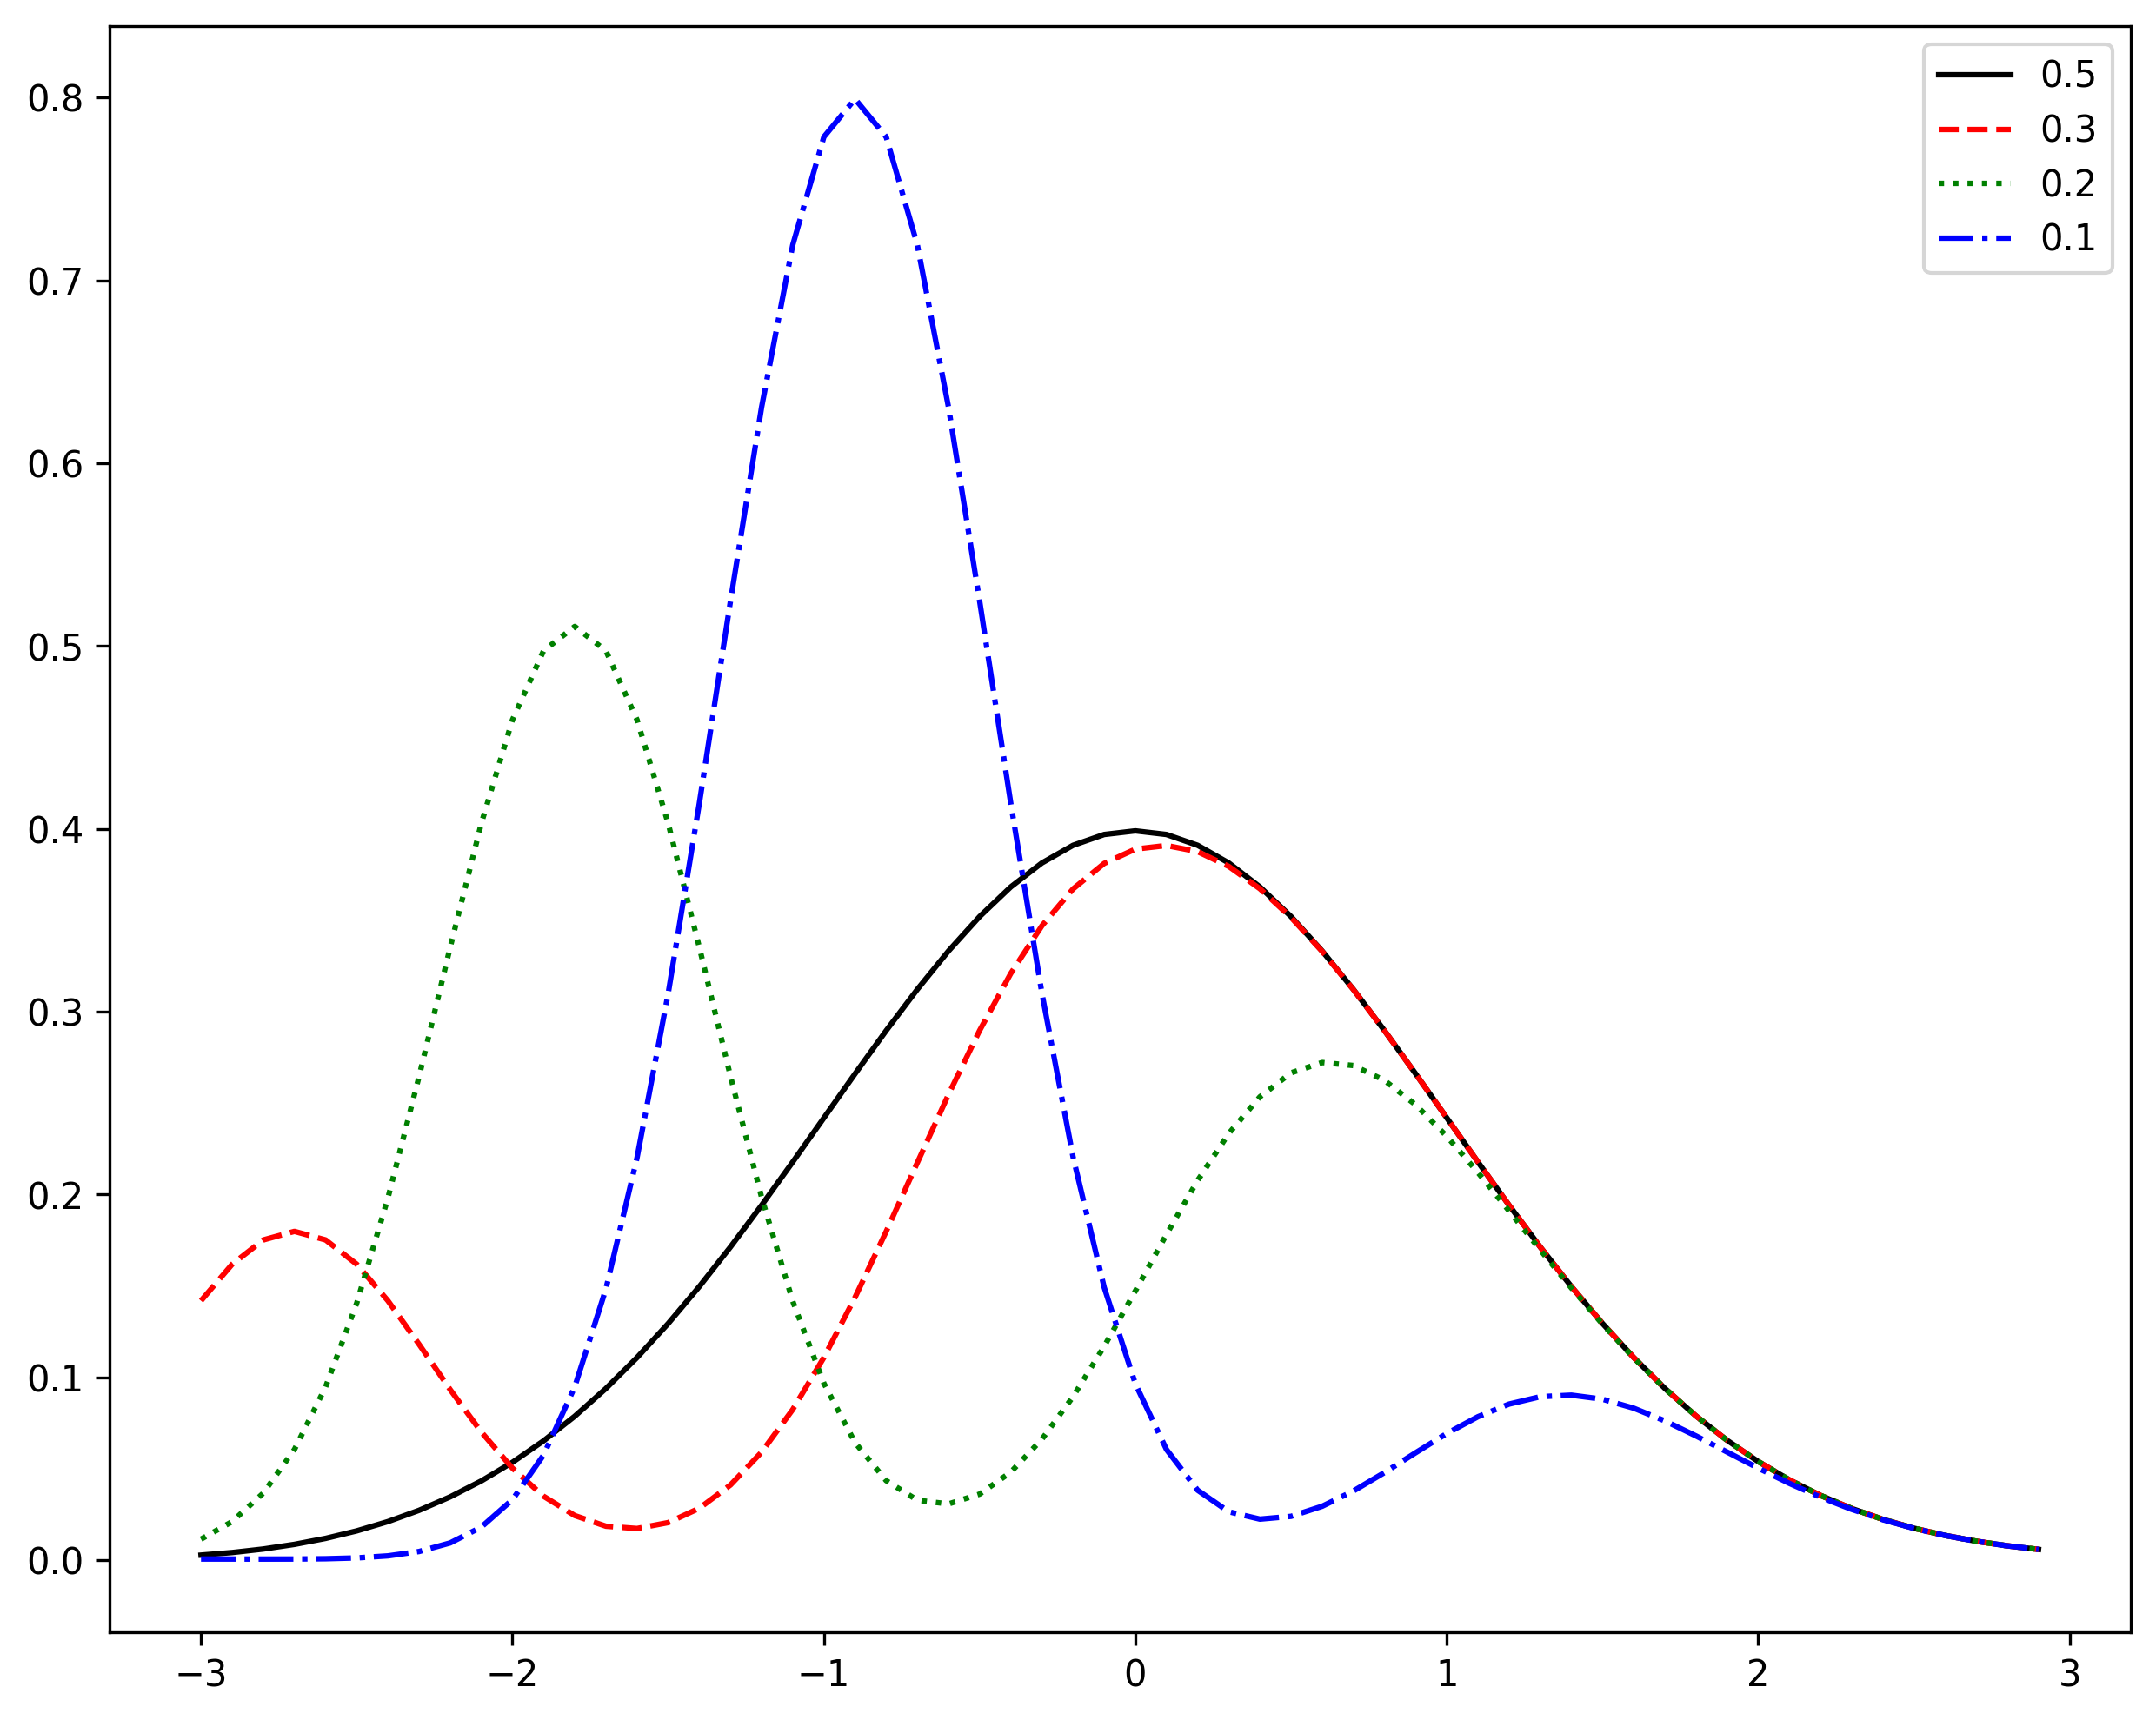

In [25]:
y = {beta: post_selection_density(x, beta, rho=.9) for beta in [.5, .3, .2, .1]}

fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)

for k, v in y.items():
    ax.plot(x, v, linestyle=LINESTYLES[k], color=COLORS[k])

ax.legend(labels=y.keys(), loc='best')

# RHO = .4

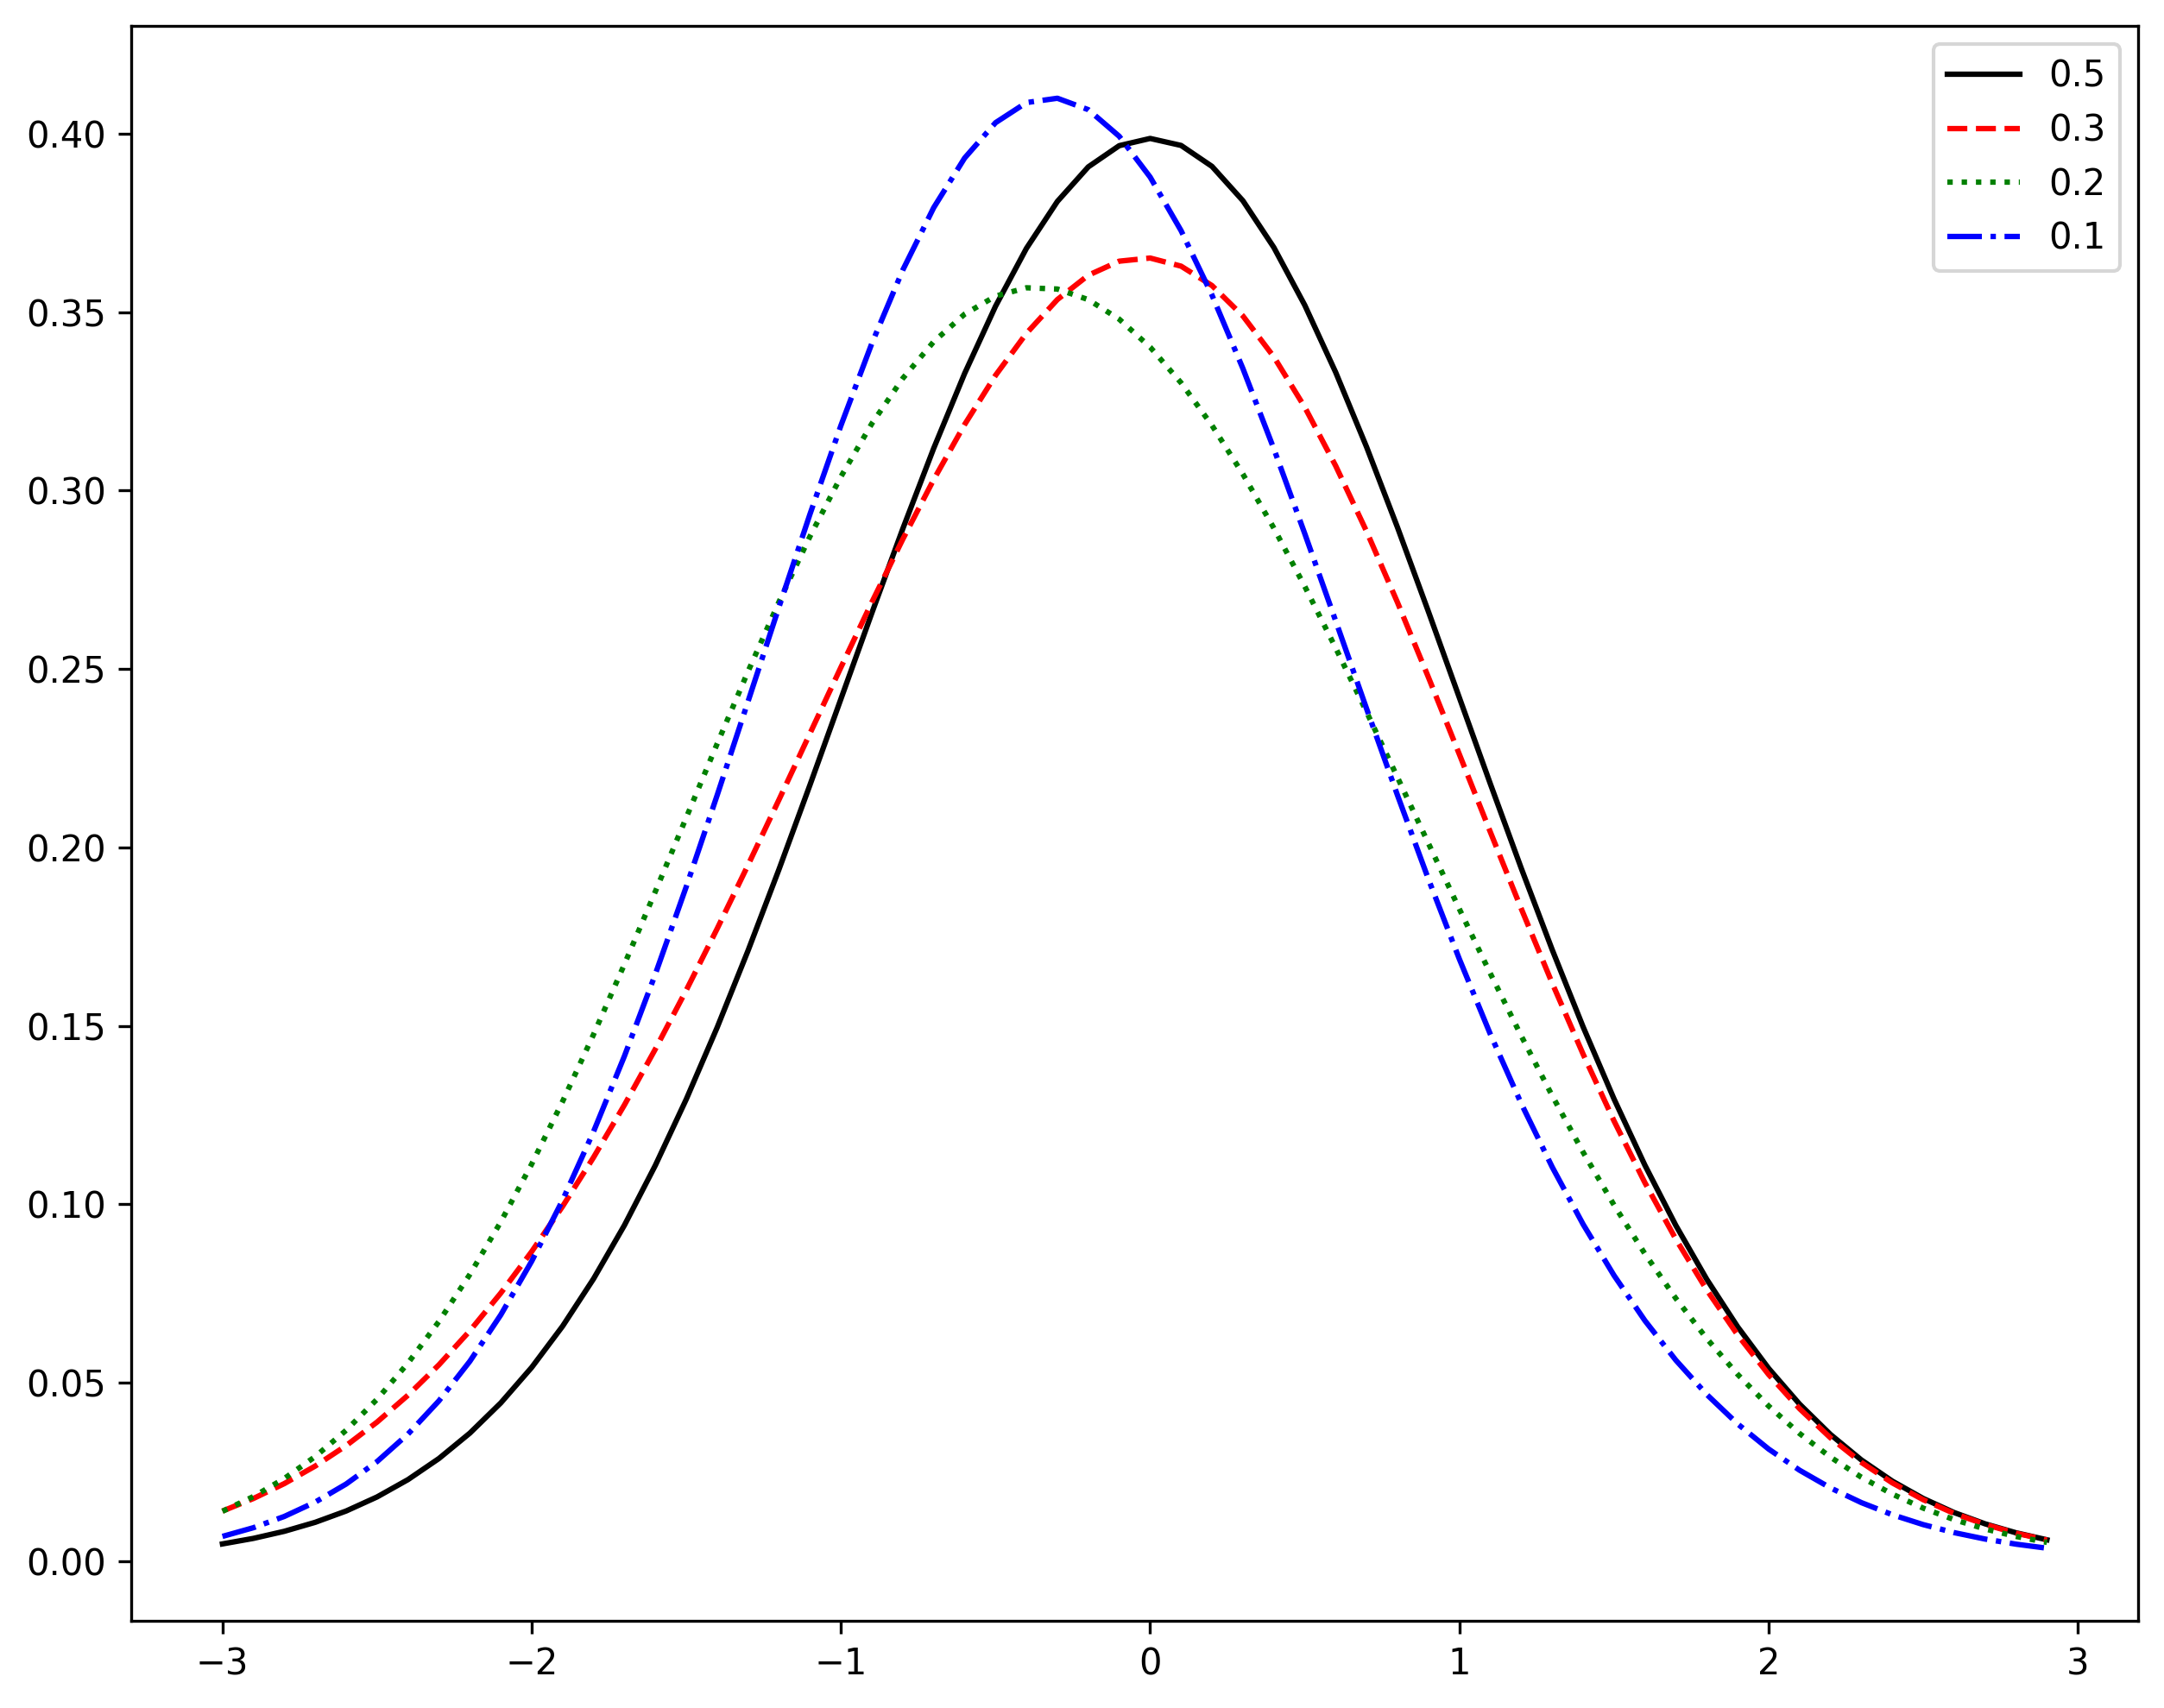

In [26]:
y = {beta: post_selection_density(x, beta, rho=.4) for beta in [.5, .3, .2, .1]}

fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)

for k, v in y.items():
    ax.plot(x, v, linestyle=LINESTYLES[k], color=COLORS[k])

ax.legend(labels=y.keys(), loc='best')